# Capstone Project: Electromobility Data Analysis

## 1. Introduction and Objective

Climate change is one of the greatest threats of the 21st century. It creates a risk for the natural environment as well as for human society. Climate change is associated with more frequent weather extremes, water and food shortages and the loss of ecosystems.  The largest driving force for climate change are greenhouse gas (GHG) emissions. Since 1850, the anthropogenic GHG emissions increased due to economic and population growth. The main source of anthro-pogenic GHG emissions are the combustion of fossil fuels for energy production. [2] 
The energy policy of the European Union aims to reduce GHG emission by at least 55 % by 2030 from 1990 levels. The Paris Agreement aims to limit the global warming to under 2 °C and pursues efforts to limit it to 1.5 °C. [3] The transport sector represents nearly a quarter of EU’s GHG emissions. The highest proportion of the transport emissions (71 % in 2018) can be traced back to road transport. In comparison to other sectors, the transport sector has not shown the same decrease of GHG emissions since 1990. Therefore, the deployment of low-emission alternative energy needs to be raised in the transport sector. [4] The further development of electromobility can play a crucial role for the reduction of GHG emissions if the electrical power is generated by renewable energy sources. [5]


In [767]:
# Focus auf EV Cars: hier irgendwie hervorheben
# Hypothesen formulieren
#Land Wie beliebt TRcuk, bus?
#Ladeinfrastruktur, wie verbreitet je Land, Verknüpfung zu Sales? -> mehr bauen
#PHEV, BEV? - wie beleibt je Land, Ladeinfrasturkur
#CO2 Regulatorien im Land, Subventionen für Elektroautos?
#Reichweite?
#Trend Verkäufe über Jahre? - mehr investieren in diese Länder
#Typ von Auto am beliebstesten

**Analysis Questions**
1. Distribution of sales and stock of different powertrain types (BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle))
2. Distribution of sales and stock of different modes (Cars, Buses, Vans, Trucks) worldwide over the last years?
3. Distribution of sales and stock of BEV and PHEV Cars to different countries in the last year.
4. Development of EV sales and EV stock since 2010.
5. Correlation between Charging points, EV stock and EV Sales
6. Forecast for different scenarios

## 2. Data Cleaning and Preparation

In [770]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [771]:
electromobility_df=pd.read_csv('IEA Global EV Data 2024.csv') # Source: [6] 

In [772]:
# leave out, what I did not use

**Data dictionary**:

|column name|content of column| values|
|--------|-------|-------|
|region|country, region or global| individual coountries, Regions (Europe, EU27, Rest of the world) or World|
|category|historical data or forecasts| Historical, Projection-STEPS (Stated Policies Scenario), Projection-APS (Announced Pledges Scenario)|
|parameter|parameter of the value |EV stock (EVs on the road), EV stock share, EV sales (New Electric car registration), EV sales share, EV charging points|
|mode|differentation of vehicle types|Cars, EV (electric vehicles), Buses, Vans, Trucks|
|powertrain|differentation of powertrain types |EV (electric vehicle), BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle)|
|year|historical years and forecast|historical (2010-2023), forecast for 2025, 2030 and 2035|
|unit|Definition of the unit of the value column|percent, number of vehicles, number of charging points|
|value|values of the corresponding parameter||ues 

In [774]:
electromobility_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [775]:
#12654 rows without any missing values
electromobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [776]:
# Check for missing data: the data set is complete
electromobility_df.isnull().any().sum()

0

In [777]:
# check for diplicates: there are no duplicates
electromobility_df.duplicated().any()

False

In [ ]:
# hier bereits Spalte mit Regionszuordnung einfügen

In [778]:
# Check the different parameters to which the values relate
electromobility_df.parameter.unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [779]:
# Splitting the DataFrame 'electromobility_df' into one DataFrame for each relevant parameter

# Create DataFrame for EV Sales
EV_sales=electromobility_df[electromobility_df['parameter']=='EV sales']
EV_sales=EV_sales.drop('parameter', axis=1)
EV_sales=EV_sales.drop('unit', axis=1)
EV_sales=EV_sales.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Sales Share
EV_sales_share=electromobility_df[electromobility_df['parameter']=='EV sales share']
EV_sales_share=EV_sales_share.drop('parameter', axis=1)
EV_sales_share=EV_sales_share.drop('unit', axis=1)
EV_sales_share=EV_sales_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Stock
EV_stock=electromobility_df[electromobility_df['parameter']=='EV stock']
EV_stock=EV_stock.drop('parameter', axis=1)
EV_stock=EV_stock.drop('unit', axis=1)
EV_stock=EV_stock.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Stock Share
EV_stock_share=electromobility_df[electromobility_df['parameter']=='EV stock share']
EV_stock_share=EV_stock_share.drop('parameter', axis=1)
EV_stock_share=EV_stock_share.drop('unit', axis=1)
EV_stock_share=EV_stock_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Charging Points
EV_charging_points=electromobility_df[electromobility_df['parameter']=='EV charging points']
EV_charging_points=EV_charging_points.drop('parameter', axis=1)
EV_charging_points=EV_charging_points.drop('unit', axis=1)
EV_charging_points=EV_charging_points.rename(columns={"value": "number of charging points"})

In [780]:
EV_sales.head()

,region,category,mode,powertrain,year,number of vehicles
2,Australia,Historical,Cars,BEV,2011,49.0
5,Australia,Historical,Cars,BEV,2012,170.0
9,Australia,Historical,Cars,PHEV,2012,80.0
10,Australia,Historical,Cars,PHEV,2013,100.0
14,Australia,Historical,Cars,BEV,2013,190.0


In [781]:
# Laden in SQL Datenbank und erneutes Aufrufen hier

## 3. Explorative Data Analysis

**3.1 Distribution of sales and stock of different powertrain types**

In [784]:
# Focus on global and historical EV Sales
EV_sales_h_gl=EV_sales[(EV_sales['category']=='Historical')  & (EV_sales['region']=='World')]

In [785]:
# Create Pivot table for differentiation of powertrains
EV_sales_h_gl_powertrain_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_gl_powertrain_pivot =EV_sales_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()
EV_sales_h_gl_powertrain_pivot.tail()

powertrain,BEV,PHEV,FCEV
year,,,
2019,1656000.0,581712.0,10615.0
2020,2164000.0,984431.0,10360.0
2021,4940000.0,1907860.0,18484.0
2022,7707000.0,2909380.0,20310.0
2023,10061000.0,4308360.0,16300.0


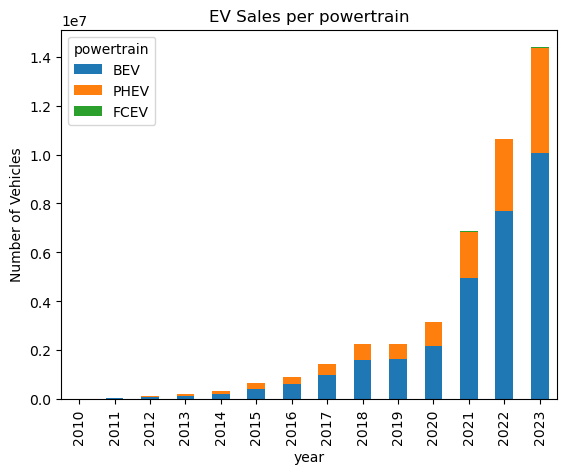

In [786]:
EV_sales_h_gl_powertrain_pivot.plot(kind='bar', stacked=True)
plt.title('EV Sales per powertrain')
plt.ylabel('Number of Vehicles')
plt.show()

Around 14 million EVs were sold in 2023. Sales of EVs have risen steadily. Full electric vehicles are the most poplar. FCEV only play a subordinate role.

In [788]:
print (f"2023 wurden weltweit {EV_sales_h_gl_powertrain_pivot[EV_sales_h_gl_powertrain_pivot.index==2023].sum().sum()} Autos verkauft")

2023 wurden weltweit 14385660.0 Autos verkauft


**3.2 Distribution of sales and stock of different modes**

In [789]:
# Create Pivot table for differentiation of powertrains
EV_sales_h_gl_mode_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_sales_h_gl_mode_pivot =EV_sales_h_gl_mode_pivot.groupby('year')[['Cars', 'Vans','Buses','Trucks']].sum()
EV_sales_h_gl_mode_pivot.head()

mode,Cars,Vans,Buses,Trucks
year,,,,
2010,7479.0,1702.0,1100.0,37.0
2011,49038.0,3700.0,840.0,200.0
2012,120030.0,11011.0,2010.0,28.0
2013,201046.0,11055.0,3900.0,40.0
2014,330094.0,11105.0,10301.0,55.0


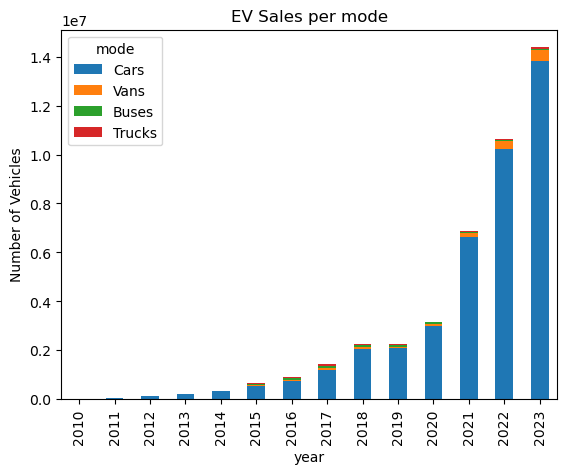

In [790]:
EV_sales_h_gl_mode_pivot.plot(kind='bar', stacked=True)
plt.title('EV Sales per mode')
plt.ylabel('Number of Vehicles')
plt.show()

The most sold EVs are Cars. Vans, Trucks and Buses only play a subordinate role.

In [792]:
EV_sales__share_h_gl=EV_sales_share[(EV_sales_share['category']=='Historical')  & (EV_sales_share['region']=='World')]

In [793]:
EV_sales__share_h_gl.head()

,region,category,mode,powertrain,year,percent of vehicles
11404,World,Historical,Cars,EV,2010,0.01100
11406,World,Historical,Trucks,EV,2010,0.00073
11430,World,Historical,Buses,EV,2010,0.05200
11438,World,Historical,Vans,EV,2010,0.01900
11444,World,Historical,Vans,EV,2011,0.04100


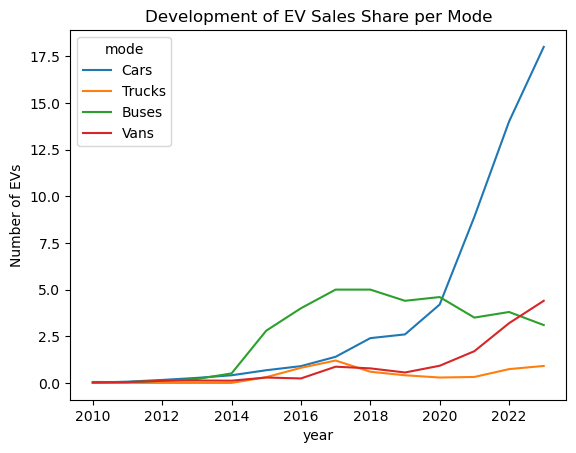

In [794]:
sns.lineplot(data=EV_sales__share_h_gl, x='year', y='percent of vehicles', hue='mode')
plt.title('Development of EV Sales Share per Mode')
plt.xlabel('year')
plt.ylabel('Number of EVs')
plt.show()

Anteil Cars steigt, Anteil Buses satgniert; wieso nicht attraktiv?
leider keine Infos über Sales Share per Powertrain
Obwohl wenige Busse verkauft, hoher Share Anteil

In [796]:
# EV stock in 2023
EV_stock_2023=EV_stock[(EV_stock['year']==2023) & (EV_stock['region']=='World') & ((EV_stock['category']=='Historical'))]
EV_stock_2023

,region,category,mode,powertrain,year,number of vehicles
12307,World,Historical,Buses,BEV,2023,650000.0
12308,World,Historical,Buses,FCEV,2023,8700.0
12310,World,Historical,Trucks,FCEV,2023,11000.0
12311,World,Historical,Trucks,PHEV,2023,1300.0
12315,World,Historical,Cars,FCEV,2023,66000.0
12316,World,Historical,Cars,PHEV,2023,12000000.0
12318,World,Historical,Trucks,BEV,2023,330000.0
12354,World,Historical,Cars,BEV,2023,28000000.0
12358,World,Historical,Vans,PHEV,2023,15000.0
12359,World,Historical,Vans,FCEV,2023,3200.0


In [797]:
# Create Pivot table for differentiation of powertrains
EV_stock_2023_mode_pivot = EV_stock_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_2023_mode_pivot

powertrain,region,category,mode,year,BEV,FCEV,PHEV
0,World,Historical,Buses,2023,650000.0,8700.0,39000.0
1,World,Historical,Cars,2023,28000000.0,66000.0,12000000.0
2,World,Historical,Trucks,2023,330000.0,11000.0,1300.0
3,World,Historical,Vans,2023,1300000.0,3200.0,15000.0


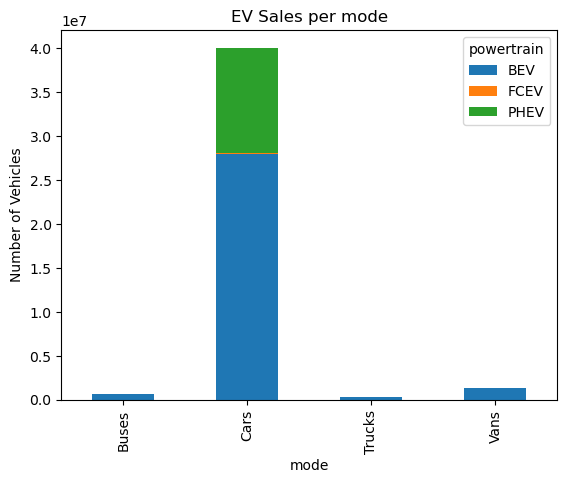

In [896]:
EV_stock_2023_mode_pivot[['mode', 'BEV', 'FCEV', 'PHEV']].plot(kind='bar', x='mode', stacked=True)
plt.title('EV Sales per mode')
plt.ylabel('Number of Vehicles')
plt.show()

<Axes: xlabel='mode', ylabel='number of vehicles'>

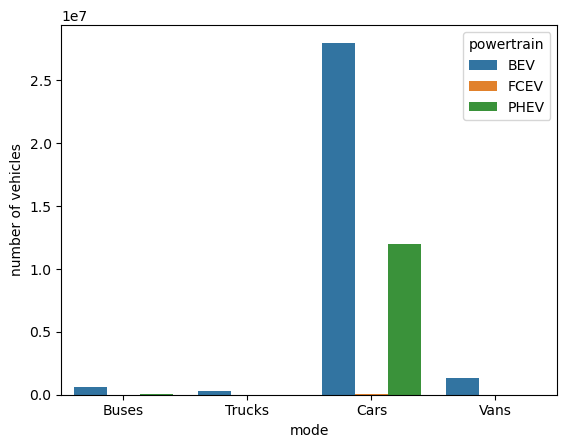

In [798]:
sns.barplot(data=EV_stock_2023, x='mode', y='number of vehicles', hue='powertrain')
# prozent des Stocks mit jeweiligen Fahrzeug typ als Kreisdiagramm (2 nebeneinander)

In [799]:
# EV stock in 2023
EV_stock_share_2023=EV_stock_share[(EV_stock_share['year']==2023) & (EV_stock_share['region']=='World') & ((EV_stock_share['category']=='Historical'))]
EV_stock_share_2023

,region,category,mode,powertrain,year,percent of vehicles
12313,World,Historical,Buses,EV,2023,3.60
12365,World,Historical,Trucks,EV,2023,0.36
12375,World,Historical,Cars,EV,2023,3.20
12377,World,Historical,Vans,EV,2023,0.85


<Axes: xlabel='mode', ylabel='percent of vehicles'>

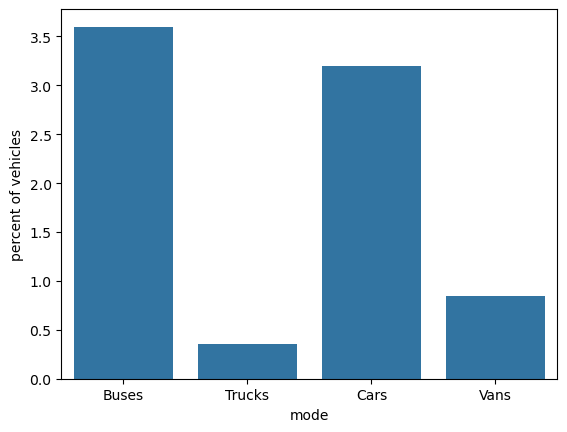

In [800]:
sns.barplot(data=EV_stock_share_2023, x='mode', y='percent of vehicles')

StockZahlen an Buse ist niedrig, aber höchster elektrifizierter Anteil; grüner ÖPNV ist wichtig für Bekämpfung Klimawandel

**3.3 Distribution of sales and stock of BEV and PHEV Cars to different countries in the last year.**

In [803]:
# Why difference between World values and sum of all countries?
# Rundungsfehler?
#Zusammenfassen of Sales and Stock als zwei Diagramme nebeneinander

In [804]:
# EV Sales
# Focus on BEV & PHEV Cars only, because other powertrain and mode only play a subordinate role.
EV_sales_h=EV_sales[(EV_sales['category']=='Historical')&(EV_sales['mode']=='Cars') & (EV_sales['powertrain']!='FCEV')]
EV_sales_share_h=EV_sales_share[(EV_sales_share['category']=='Historical')&(EV_sales_share['mode']=='Cars')]

In [805]:
# EV Sales: Top Countries in 2023
EV_sales_h_2023=EV_sales_h[(EV_sales_h['year']==2023)]

#exclude summary of countries
exclude_regions=['World', 'Europe', 'EU27'] 
EV_sales_h_2023=EV_sales_h_2023[~EV_sales_h_2023.region.isin(exclude_regions)]

#Top 10 Countries for all EV Sales and split for BEV and PHEV
EV_sales_h_2023_pivot = EV_sales_h_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_2023_pivot['Sum of EV']=EV_sales_h_2023_pivot['BEV']+EV_sales_h_2023_pivot['PHEV']
EV_sales_2023_top_countries=EV_sales_h_2023_pivot.sort_values(by='Sum of EV', ascending=False).head(10)
EV_sales_2023_top_countries

powertrain,region,category,mode,year,BEV,PHEV,Sum of EV
7,China,Historical,Cars,2023,5400000.0,2700000.0,8100000.0
46,USA,Historical,Cars,2023,1100000.0,290000.0,1390000.0
17,Germany,Historical,Cars,2023,520000.0,180000.0,700000.0
16,France,Historical,Cars,2023,310000.0,160000.0,470000.0
48,United Kingdom,Historical,Cars,2023,310000.0,140000.0,450000.0
31,Netherlands,Historical,Cars,2023,130000.0,80000.0,210000.0
2,Belgium,Historical,Cars,2023,93000.0,100000.0,193000.0
43,Sweden,Historical,Cars,2023,110000.0,61000.0,171000.0
5,Canada,Historical,Cars,2023,130000.0,41000.0,171000.0
25,Japan,Historical,Cars,2023,88000.0,52000.0,140000.0


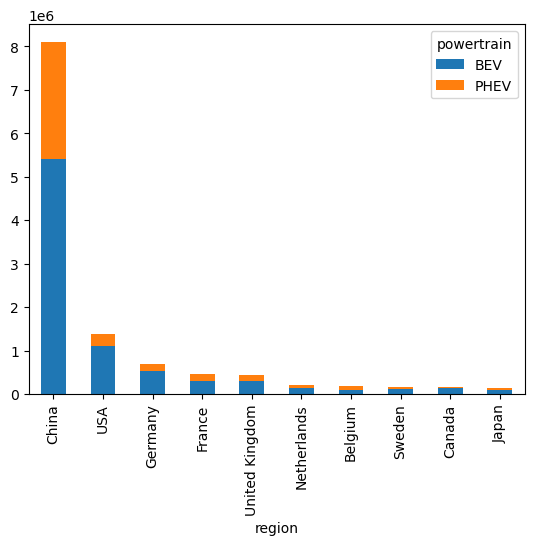

In [806]:
EV_sales_2023_top_countries[['region','BEV', 'PHEV']].plot(kind='bar', x='region',stacked='True')
plt.show()

China has by far the largest sales market for electric cars. But it is also a very large country. Therefore the focus will be on the Sales Share in the next step.

In [808]:
EV_sales_share_2023_per_countries= pd.DataFrame(EV_sales_share_h[EV_sales_share_h['year']==2023].groupby('region')['percent of vehicles'].sum().sort_values(ascending=False))
exclude_regions=['World', 'Europe', 'EU27']
EV_sales_share_2023_per_countries=EV_sales_share_2023_per_countries[~EV_sales_share_2023_per_countries.index.isin(exclude_regions)]
EV_sales_share_2023_per_countries.head()

,percent of vehicles
region,
Norway,93.0
Iceland,71.0
Sweden,60.0
Finland,54.0
Denmark,46.0


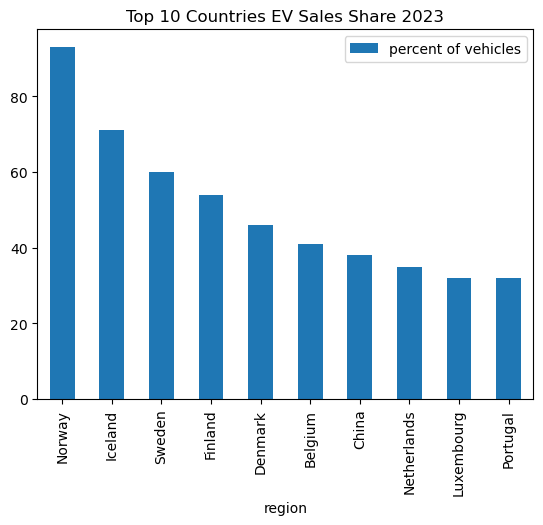

In [809]:
EV_sales_share_2023_per_countries.head(10).plot(kind='bar')
plt.title('Top 10 Countries EV Sales Share 2023')
plt.show()

The sales share of electric cars is particularly high in the Scandinavian countries.

In [811]:
# EV Stock
# Focus on BEV & PHEV Cars only, because other powertrain and mode only play a subordinate role.
EV_stock_h=EV_stock[(EV_stock['category']=='Historical')&(EV_stock['mode']=='Cars') & (EV_stock['powertrain']!='FCEV')]
EV_stock_share_h=EV_stock_share[(EV_stock_share['category']=='Historical')&(EV_stock_share['mode']=='Cars')]

In [812]:
EV_stock_h

,region,category,mode,powertrain,year,number of vehicles
3,Australia,Historical,Cars,BEV,2011,49.0
4,Australia,Historical,Cars,BEV,2012,220.0
8,Australia,Historical,Cars,PHEV,2012,80.0
11,Australia,Historical,Cars,PHEV,2013,180.0
15,Australia,Historical,Cars,BEV,2013,410.0
...,...,...,...,...,...,...
12078,World,Historical,Cars,BEV,2021,11000000.0
12125,World,Historical,Cars,BEV,2022,18000000.0
12163,World,Historical,Cars,PHEV,2022,8000000.0
12316,World,Historical,Cars,PHEV,2023,12000000.0


In [813]:
# EV Stock: Top Countries in 2023
EV_stock_h_2023=EV_stock_h[(EV_stock_h['year']==2023)]

#exclude summary of countries
exclude_regions=['World', 'Europe', 'EU27'] 
EV_stock_h_2023=EV_stock_h_2023[~EV_stock_h_2023.region.isin(exclude_regions)]

#Top 10 Countries for all EV Stocks and split for BEV and PHEV
EV_stock_h_2023_pivot = EV_stock_h_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_h_2023_pivot['Sum of EV']=EV_stock_h_2023_pivot['BEV']+EV_stock_h_2023_pivot['PHEV']
EV_stock_2023_top_countries=EV_stock_h_2023_pivot.sort_values(by='Sum of EV', ascending=False).head(10)
EV_stock_2023_top_countries

powertrain,region,category,mode,year,BEV,PHEV,Sum of EV
6,China,Historical,Cars,2023,16000000.0,5800000.0,21800000.0
31,USA,Historical,Cars,2023,3500000.0,1300000.0,4800000.0
11,Germany,Historical,Cars,2023,1500000.0,1000000.0,2500000.0
32,United Kingdom,Historical,Cars,2023,980000.0,600000.0,1580000.0
10,France,Historical,Cars,2023,980000.0,590000.0,1570000.0
22,Norway,Historical,Cars,2023,690000.0,210000.0,900000.0
20,Netherlands,Historical,Cars,2023,440000.0,260000.0,700000.0
28,Sweden,Historical,Cars,2023,290000.0,270000.0,560000.0
4,Canada,Historical,Cars,2023,380000.0,170000.0,550000.0
17,Japan,Historical,Cars,2023,290000.0,250000.0,540000.0


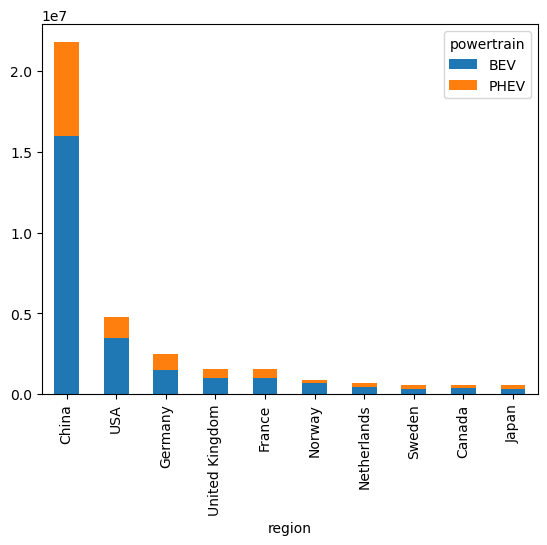

In [814]:
EV_stock_2023_top_countries[['region','BEV', 'PHEV']].plot(kind='bar', x='region',stacked='True')
plt.show()

In [815]:
EV_stock_share_2023_per_countries= pd.DataFrame(EV_stock_share_h[EV_stock_share_h['year']==2023].groupby('region')['percent of vehicles'].sum().sort_values(ascending=False))
exclude_regions=['World', 'Europe', 'EU27']
EV_stock_share_2023_per_countries=EV_stock_share_2023_per_countries[~EV_stock_share_2023_per_countries.index.isin(exclude_regions)]
EV_stock_share_2023_per_countries.head()

,percent of vehicles
region,
Norway,29.0
Iceland,18.0
Sweden,11.0
Denmark,11.0
Netherlands,8.3


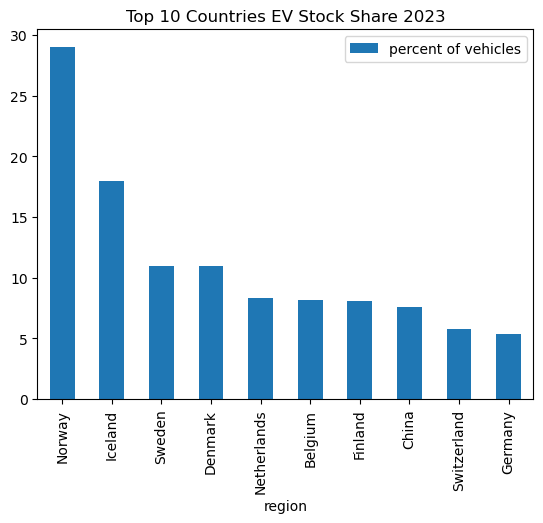

In [816]:
EV_stock_share_2023_per_countries.head(10).plot(kind='bar')
plt.title('Top 10 Countries EV Stock Share 2023')
plt.show()

In [817]:
EV_sales_share_vs_stock_share=pd.merge(EV_sales_share_2023_per_countries, EV_stock_share_2023_per_countries, how='inner', on='region')
EV_sales_share_vs_stock_share=EV_sales_share_vs_stock_share.rename(columns={"percent of vehicles_x": "sales share", "percent of vehicles_y": "stock share"})
EV_sales_share_vs_stock_share.head()

,sales share,stock share
region,,
Norway,93.0,29.0
Iceland,71.0,18.0
Sweden,60.0,11.0
Finland,54.0,8.1
Denmark,46.0,11.0


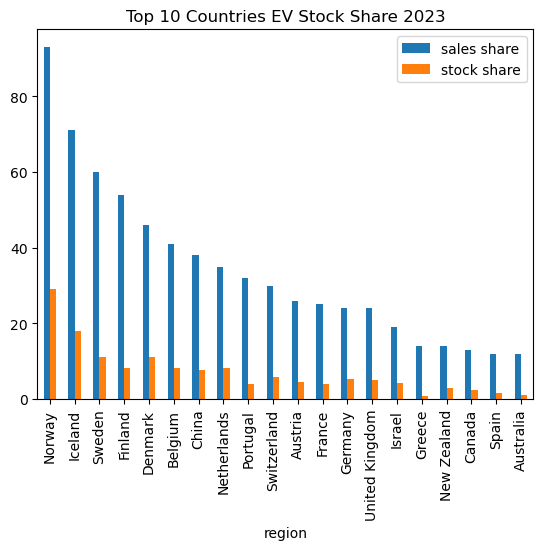

In [818]:
EV_sales_share_vs_stock_share.head(20).plot(kind='bar')
plt.title('Top 10 Countries EV Stock Share 2023')
plt.show()

hoher Anteil und hohes Interesse an Elektroautos in den skandinavischen Ländern

**3.4 Development of EV sales and EV stock for different regions since 2010**

In [822]:
# Distribution of EV Stock
#Spalte mit Regionszuordnung bereits in electromobility_df einarbeiten!!!!!!!!!!!!!

#include summary of countries
include_regions=['USA', 'Europe', 'China'] 
EV_stock_h_USA_Europe_China=EV_stock_h[EV_stock_h.region.isin(include_regions)]

# Overview over the years of the different regions
EV_stock_h_USA_Europe_China_development=pd.DataFrame(EV_stock_h_USA_Europe_China.groupby(['year', 'region'])['number of vehicles'].sum())
EV_stock_h_USA_Europe_China_development_pivot = EV_stock_h_USA_Europe_China_development.pivot_table(index=['year'], columns='region', values='number of vehicles').reset_index()
EV_stock_h_USA_Europe_China_development_pivot.head()

#Definition of other countries as all countries beside 'include regions'
other_regions=['Australia', 'Brazil', 'Canada','Chile', 'Colombia', 'Costa Rica', 'India', 'Israel', 'Japan', 'Korea', 'Mexico', 'New Zealand', 'Rest of the world','Seychelles', 'South Africa', 'United Arab Emirates']
EV_stock_other_countries=EV_stock_h[EV_stock_h.region.isin(other_regions)]

# Overview over the years of the different regions
EV_stock_other_countries_development=pd.DataFrame(EV_stock_other_countries.groupby('year')['number of vehicles'].sum())
EV_stock_other_countries_development=EV_stock_other_countries_development.rename(columns={'number of vehicles':'other countries'})
EV_stock_other_countries_development=EV_stock_other_countries_development.reset_index()
EV_stock_other_countries_development

# Merge with other countries
EV_stock_development_over_time=pd.merge(EV_stock_h_USA_Europe_China_development_pivot, EV_stock_other_countries_development, how='inner', on='year')
EV_stock_development_over_time.head()

,year,China,Europe,USA,other countries
0,2010,1940.0,9863.0,3800.0,4461.0
1,2011,6960.0,20510.0,22000.0,18617.0
2,2012,16920.0,46700.0,75000.0,48747.0
3,2013,32600.0,104000.0,172000.0,81448.0
4,2014,85000.0,200000.0,290000.0,133023.0


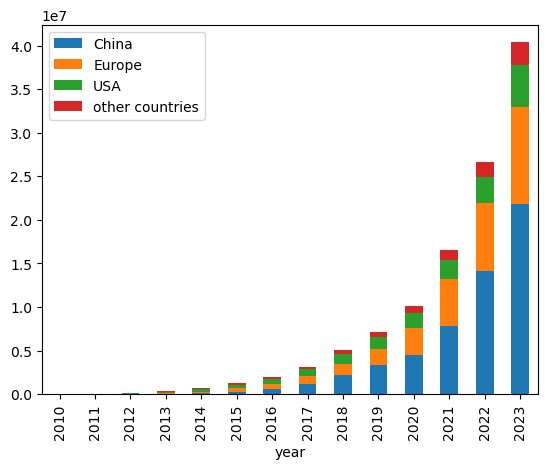

In [823]:
EV_stock_development_over_time.plot(kind='bar', x='year', stacked='True')
plt.show()

**3.5 Correlation between Charging points, EV stock and EV Sales**

In [824]:
#Correlation between chargign Points and Sales?
#Länder/ Regionen mit höchsten Anteil an EVs, höchster Anteil an EVs Sales vs EV Stock

In [ ]:
#Correlation Assignment in Excel

**3.6. Forecast for different scenarios**

## 4. Conclusion and Outlook

In [826]:
# Results: hier darstellen und nochmals in PowerBi als Dashboard

In [827]:
# Next steps:
# check subsidies in the countries; influence?
# check References, not all work

**References**: #check if References work

[1] R. K. Pachauri and L. Mayer, eds., Climate change 2014: Synthesis report, Intergovern-mental Panel on Climate Change, Geneva, Switzerland, 2015 

[2] O. Edenhofer, ed., Renewable energy sources and climate change mitigation: Special Re-port of the intergovernmental panel on climate change  Cambridge University Press, Cambridge, 201
 
[3] “European Union, https://ec.europa.eu/clima/policies/international/negotiations/paris_)

[4] “European Union, https://ec.europa.eu/clima/policies/transport_en”

[5] “https://www.eea.europa.eu/data-and-maps/indicators/transport-emissions-of-green-house-gases-7/assessment”


[6] "https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#overview",”.
